# Section 3  
Name: Michelle Fong  


In [3]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.decomposition import PCA
from Activity5 import *    

## I

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Datasets for training
labeled = pd.read_csv('Task2C_labeled.csv') # autoencoder & classifier
unlabeled = pd.read_csv('Task2C_unlabeled.csv') # autoencoder 

# Datasets for testing
test = pd.read_csv('Task2C_test.csv')

In [5]:
labeled.shape

(50, 785)

In [6]:
unlabeled.shape

(1500, 784)

In [7]:
test.shape

(500, 785)

In [8]:
x_labeled = labeled.drop('label', axis=1)
y_labeled = labeled['label']

x_test= test.drop('label', axis=1)
y_test = test['label']

## II

In [9]:
print(list(range(20, 221, 40)))

[20, 60, 100, 140, 180, 220]


In [10]:
epochs = 10
lr = 0.001
activation = 'Tanh'

# list of result 
results = []

# Loop through different neuron counts
for neuron in range(20, 221, 40):
    hidden = [neuron]
    
    # Train the autoencoder for the current configuration
    AE_model, losses = train_autoencoder(    
        X_train=x_labeled,  # training data
        hidden=hidden,  # number of layers and their units
        epochs=epochs,  # maximum number of epochs  
        activation=activation,  # activation function
        lr=lr   # learning rate
    )
    
    # resulted loss, model and neurons for each neuron
    results.append({
        'hidden_neurons': neuron,
        'AE_model': AE_model,
        'losses': losses
    })

Training Model on cpu
Epoch 0 out of 10. Loss:1.1056290566921234
Epoch 1 out of 10. Loss:1.0621652603149414
Epoch 2 out of 10. Loss:1.0366917699575424
Epoch 3 out of 10. Loss:1.011480987071991
Epoch 4 out of 10. Loss:0.9873030334711075
Epoch 5 out of 10. Loss:0.9613412320613861
Epoch 6 out of 10. Loss:0.9352604448795319
Epoch 7 out of 10. Loss:0.9081120789051056
Epoch 8 out of 10. Loss:0.8812265247106552
Epoch 9 out of 10. Loss:0.8551993817090988
Training Model on cpu
Epoch 0 out of 10. Loss:1.0857006013393402
Epoch 1 out of 10. Loss:0.9971341490745544
Epoch 2 out of 10. Loss:0.9264962375164032
Epoch 3 out of 10. Loss:0.8601401001214981
Epoch 4 out of 10. Loss:0.8020535558462143
Epoch 5 out of 10. Loss:0.7539809048175812
Epoch 6 out of 10. Loss:0.7160055041313171
Epoch 7 out of 10. Loss:0.6851745694875717
Epoch 8 out of 10. Loss:0.658407598733902
Epoch 9 out of 10. Loss:0.6342011094093323
Training Model on cpu
Epoch 0 out of 10. Loss:1.0591139942407608
Epoch 1 out of 10. Loss:0.9113469

## III

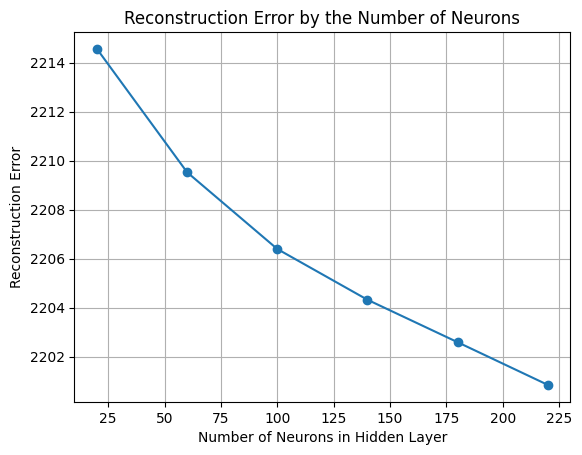

In [11]:
import matplotlib.pyplot as plt

# placeholder
num_units_list = []
reconstruction_errors = []

for result in results:
    num_units = result['hidden_neurons']
    autoencoder_model = result['AE_model']
    X_labeled_np = x_labeled.values # np.array
    
    # passing X_labeled_np as datatype tourch.FloatTensor & convert to array
    X_reconstructed = autoencoder_model(torch.FloatTensor(X_labeled_np)).detach().numpy()

    #  euclidean_distances btw input (x_labeled) and output (X_reconstructed)
    euclidean_distances = np.sqrt(np.sum((x_labeled - X_reconstructed) ** 2, axis=1))
    
    # average of euclidean_distances
    reconstruction_error = np.mean(euclidean_distances)
    
    # update result
    num_units_list.append(num_units)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors
plt.plot(num_units_list, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error by the Number of Neurons')
plt.grid(True)
plt.show()


In [12]:
reconstruction_errors

[2214.5633437184824,
 2209.5266518883273,
 2206.393891856661,
 2204.321823679139,
 2202.5879511655908,
 2200.845583357968]

The reconstruction error is decreasing as expected when the number of neurons increases. THis is because the number of neurons adjust the complexity of the model. It is more capable to capturing complex pattern as the number of neurons increases. This reduction slows downs as the neurons increase from 175 to 225. At this point the model is getting more complicated yet not improving performance which might be an indicator of overfitting. From above plot, the optimal neurons = 100.

## IV

In [13]:
## Accuracy
def accuracy(pred, label):
    return (pred == label).mean()


epochs = 10
lr = 0.001
activation = 'Tanh'

# lst to store all results
results = []


for neuron in range(20, 221, 40):
    hidden = [neuron]
    
    # Train the classifier for the current configuration
    classifier_model, epoch_losses = train_classifier(
        X_train=x_labeled,  # training data
        Y_train=y_labeled,  # training labels
        hidden=hidden,    # number of layers and their units
        activation=activation,  # activation function
        epochs=epochs,    # maximum number of epochs
        lr=lr             # learning rate
    )
    
    X_test_np = x_test.values # np.array
    
    test_outputs = classifier_model(torch.FloatTensor(X_test_np)).detach().numpy()
    predicted = np.argmax(test_outputs, axis=1)

    
    test_accuracy = 1- accuracy(predicted, y_test)
    
    # store as dict 
    results.append({
        'hidden_neurons': neuron,
        'test_errors': test_accuracy
    })


Training Model on cpu
Epoch 0 out of 10. Loss:2.18390291929245
Epoch 1 out of 10. Loss:1.7579255104064941
Epoch 2 out of 10. Loss:1.5477935075759888
Epoch 3 out of 10. Loss:1.4017759561538696
Epoch 4 out of 10. Loss:1.276676967740059
Epoch 5 out of 10. Loss:1.1736493408679962
Epoch 6 out of 10. Loss:1.089134305715561
Epoch 7 out of 10. Loss:1.0156140327453613
Epoch 8 out of 10. Loss:0.9504155367612839
Epoch 9 out of 10. Loss:0.8932764679193497
Training Model on cpu
Epoch 0 out of 10. Loss:2.1363047659397125
Epoch 1 out of 10. Loss:1.402715414762497
Epoch 2 out of 10. Loss:1.1011712104082108
Epoch 3 out of 10. Loss:0.8817277774214745
Epoch 4 out of 10. Loss:0.719028115272522
Epoch 5 out of 10. Loss:0.598955899477005
Epoch 6 out of 10. Loss:0.5028944332152605
Epoch 7 out of 10. Loss:0.42446357756853104
Epoch 8 out of 10. Loss:0.36053546518087387
Epoch 9 out of 10. Loss:0.3079949915409088
Training Model on cpu
Epoch 0 out of 10. Loss:2.1273697316646576
Epoch 1 out of 10. Loss:1.2397464215

In [14]:
# print out stored results
for result in results:
    print(f'Neurons: {result["hidden_neurons"]}, Test Error: {result["test_errors"]}')


Neurons: 20, Test Error: 0.552
Neurons: 60, Test Error: 0.45599999999999996
Neurons: 100, Test Error: 0.42000000000000004
Neurons: 140, Test Error: 0.4
Neurons: 180, Test Error: 0.394
Neurons: 220, Test Error: 0.384


## V

In [29]:
epochs = 10
lr = 0.001
activation = 'Tanh'

results = []

for neuron in range(20, 221, 40):
    hidden = [neuron]
    # autoencoder
    AE_model, _ = train_autoencoder(    
        X_train=x_labeled,  # training data
        hidden=hidden,  # number of layers and their units
        epochs=epochs,  # maximum number of epochs  
        activation=activation,  # activation function
        lr=lr   # learning rate
    )
    
    # extract feature: middle layer of the ae_model
    X_extra_features = get_deepfeatures(AE_model, x_labeled, layer_number = 1 )
    
    # adding back to the original data
    X_combined = np.concatenate((x_labeled, X_extra_features), axis=1)

    
    asn_results = []
    num_extra_features = X_extra_features.shape[1]

    # NN
    for num_hidden_neurons in range(20, 221, 40):
        hidden_neurons = [num_hidden_neurons]
        
        classifier_model, loss = train_classifier(
            X_train=X_combined,  # training data with extra features
            Y_train=y_labeled,   # training labels
            hidden=hidden_neurons,  # number of layers and their units
            activation=activation,   # activation function
            epochs=epochs,   # maximum number of epochs
            lr=lr            # learning rate
        )
        
        # matching the dimension
        test_extra_feature = np.zeros((x_test.shape[0], num_extra_features))
    
        # concate extra features with the original data
        X_test_np = np.concatenate((x_test.values, test_extra_feature), axis=1)
        
        test_outputs = classifier_model(torch.FloatTensor(X_test_np)).detach().numpy()
        predicted = np.argmax(test_outputs, axis=1)
        
        test_errors = 1- accuracy(predicted, y_test)
        
        # append results
        asn_results.append({
            'hidden_neurons': num_hidden_neurons,
            'test_errors': test_errors
        })
    
    results.append({
        'hidden_neurons_ae': neuron,
        'ae_model': AE_model,
        'asn_results': asn_results
    })


Training Model on cpu
Epoch 0 out of 10. Loss:1.0969355404376984
Epoch 1 out of 10. Loss:1.0611213147640228
Epoch 2 out of 10. Loss:1.028277188539505
Epoch 3 out of 10. Loss:1.0055169463157654
Epoch 4 out of 10. Loss:0.9818221181631088
Epoch 5 out of 10. Loss:0.9567239731550217
Epoch 6 out of 10. Loss:0.9313303381204605
Epoch 7 out of 10. Loss:0.9056293219327927
Epoch 8 out of 10. Loss:0.8802026659250259
Epoch 9 out of 10. Loss:0.8553490787744522
Training Model on cpu
Epoch 0 out of 10. Loss:2.3054118752479553
Epoch 1 out of 10. Loss:1.7074083983898163
Epoch 2 out of 10. Loss:1.492456093430519
Epoch 3 out of 10. Loss:1.338938146829605
Epoch 4 out of 10. Loss:1.1907954290509224
Epoch 5 out of 10. Loss:1.079432174563408
Epoch 6 out of 10. Loss:0.9996833503246307
Epoch 7 out of 10. Loss:0.9310927838087082
Epoch 8 out of 10. Loss:0.8649569600820541
Epoch 9 out of 10. Loss:0.8051850944757462
Training Model on cpu
Epoch 0 out of 10. Loss:2.211139142513275
Epoch 1 out of 10. Loss:1.4953303039

In [30]:
# Print or analyze the results as needed
for result in results:
    print(f'Autoencoder Hidden Neurons: {result["hidden_neurons_ae"]}')
    for asn_result in result['asn_results']:
        print(f'  NN Hidden Neurons: {asn_result["hidden_neurons"]}, Test Error: {asn_result["test_errors"]}')


Autoencoder Hidden Neurons: 20
  NN Hidden Neurons: 20, Test Error: 0.484
  NN Hidden Neurons: 60, Test Error: 0.46199999999999997
  NN Hidden Neurons: 100, Test Error: 0.46599999999999997
  NN Hidden Neurons: 140, Test Error: 0.398
  NN Hidden Neurons: 180, Test Error: 0.382
  NN Hidden Neurons: 220, Test Error: 0.384
Autoencoder Hidden Neurons: 60
  NN Hidden Neurons: 20, Test Error: 0.552
  NN Hidden Neurons: 60, Test Error: 0.43000000000000005
  NN Hidden Neurons: 100, Test Error: 0.42000000000000004
  NN Hidden Neurons: 140, Test Error: 0.41000000000000003
  NN Hidden Neurons: 180, Test Error: 0.41400000000000003
  NN Hidden Neurons: 220, Test Error: 0.42400000000000004
Autoencoder Hidden Neurons: 100
  NN Hidden Neurons: 20, Test Error: 0.554
  NN Hidden Neurons: 60, Test Error: 0.43999999999999995
  NN Hidden Neurons: 100, Test Error: 0.42800000000000005
  NN Hidden Neurons: 140, Test Error: 0.42600000000000005
  NN Hidden Neurons: 180, Test Error: 0.382
  NN Hidden Neurons: 220

## VI

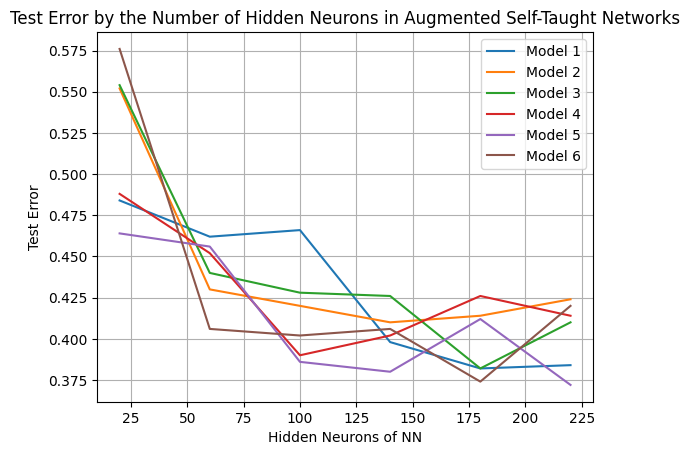

In [32]:
hidden_neurons = []
test_errors = []

for result in results:
    hidden_neurons.append(result['hidden_neurons_ae'])
    test_errors.append([res['test_errors'] for res in result['asn_results']])

# Create a line plot for each set of test errors
for i, test_error in enumerate(test_errors):
    plt.plot(hidden_neurons, test_error, label=f"Model {i + 1}")

plt.xlabel("Hidden Neurons of NN")
plt.ylabel("Test Error")
plt.title("Test Error by the Number of Hidden Neurons in Augmented Self-Taught Networks")
plt.legend()
plt.grid()

The autoencoder is used to introduce additional features and adding complexity to the model. The output of the autoencoder will be the input of the Augment self-taught model. From the autoencoder plot, the reconstruction error is quite hight but keep decreasing as the number of neurons increase.  

For Augmented self-taught models, the test error is fluctuating after 100 hidden neurons, which can be an indicator of overfitting after having 100 neurons. The best number of neurons is about 55. Having too many neurons along with additional features tends to overfit the model.  

The difference between the 2 models here: autoencoder first encode the data into features and decode the features. The reconstruction data is compared with the original data to find the error. The augmented self-taught model takes in the encoded features and the original data, and output the predicted label. In this case, the accuracy is calculated by comparing the predicted label and the actual label.  

Model 6 corresponds to 220 hidden neurons with 220 additional features, with that amount of complexity, it performs the best when NN model has 55 hidden neurons.